# COGS 118A- Final Project Report

# Names


- Kimberly Liu
- Ruoxuan Li
- Juan Castillejos-Garcia
- Manan Surana

#Abstract
Our goal of the project is to find the best method to predict the readmission rates of diabetes patients in the  US by comparing different classification methods learned in class. The data used represents 10 years (1999–2008) of clinical care at 130 hospitals throughout the United States. It contains over 50 attributes such as patient number, race, gender, and age, etc. and 3 classification labels: >30(readmitted after 30 days), <30(readmitted within 30 days), and no (no readmission). We selected a range of diffferent attributes to create various datasets and use them to predict the readmission rates via ML methods such as SoftMax regression, multi-class SVM, KNN, Decision tree and Multilayer perceptron. We compare the models' performace by looking at the rates of Type 1, Type 2 errors and overall accuracy. However, our experiments indicate that the features of the dataset are  not  ideal for the task.

# Background
Diabetes is associated with an increased risk of heart disease, stroke, high blood pressure and narrowing of blood vessels<a name = "https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/symptoms-causes/syc-20351193#:~:text=Potential%20complications%20of%20diabetes%20and,damage%20(neuropathy)%20in%20limbs."></a>[<sup>[1]</sup>](#abc). The high readmission rates of diabetes patients bring heavy burden to the medical systems in the US.
According to one of the research, thirty-day readmission rates for hospitalized patients with diabetes are reported to be between 14.4 and 22.7%, much higher than the rate for all hospitalized patients (8.5–13.5%)<a name="https://clindiabetesendo.biomedcentral.com/articles/10.1186/s40842-016-0040-x"></a>[<sup>[2]</sup>](#admonishnote). In order to provide better care for patients who are diagnosed with diabetes, some researchers have attempted to predict the readmission rates with certain attributes associated with patients.
Prior study done by _Strack, Beata, et al_. suggests that the relationship between the probability of readmission and the HbA1c measurement depends on the primary diagnosis<a name="https://www.hindawi.com/journals/bmri/2014/781670/"></a>[<sup>[3]</sup>](#wfds) using multivariable logistic regression. 
In this project, we want to explore machine learning algorithms that might help us better predict the readmission rates to which could be useful for small town policy makers to allocate medical resources and personnel more appropriately.


# Problem Statement

The U.S has a problem of access to health care<a name="ander"></a>[<sup>[4]</sup>](#ander). The number of health care professional required to service the aging population is greater than the number of well-trained medical professionals being supplied. Rural areas are especially vulnerable to not having many qualified doctors and nurses<a name="ziller"></a>[<sup>[5]</sup>](#ziller). Our goal of this project is improving patient outcomes by exploring the accuracy of 4 machine learning models in predicting readmission rate of patients using historic data collected over 10 years. Most hospitals keep a clinical history for every patient admitted which in rural areas can be used as input to an efficient machine learning algorithm to predict staffing and funding needs. Our project seeks to use features found in such clinical histories to label a patient into each of the 3 readmission categories. For any given time interval of a hospital, a "future prediction set" could be put through the algorithm with best performance to label each patient. Taking the count of each of the patients in the predcition set labeled as needing readmission, the readmission rate for the following 30 days could be computed.

# Data
For this project, we use "Diabetes 130-US hospitals" dataset training and testing dataset. The dataset comes from The UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

For our experiments, we split our dataset into a training dataset and a test dataset. The training dataset is used to train the different machine learning algorithms that we used. After traning our models or classifiers with the training dataset, we will need a testing dataset to test them. Due to the size of the dataset cross validation was hard to implement, but hyperpareter tunning used gridsearch was performed.
The dataset represents clinical care provided between 1999 to 2008 at 130 US hospitals. The dataset contains of categorical and quantitative variables
There are 55 different variables that represent each observation. There are 100,000 observations present in the dataset. Each observation consists of the following atributes:

- 'encounter_id'  and 'patient_nbr' are numerical variables(feature) that the hospital used to identify the patitent during a particualr visit. These are removed from the datasets as they are not expected to contribute any significant information to the model. 
- 'race' is  a nominal variable with values: Caucasian, Asian, African American, Hispanic, and other. Some patients had these value missing and were removed during data cleaning.
-'gender' is a nominal variable with values: male, female, and unknown/invalid. Patients whose gender was in the third class were removed from the training and testing datasets.
- 'age' is a nominal variable grouped in 10-year intervals with ages ranging in [0,100). This variable did not have any missing values, but was converted to an integer variable by selecting the lower bound of the corresponding interval as its value.
- 'weight' is a numerical variable of the patients weight in pounds. However, the majority of this subjects had this value missing. As such, it was decided to not include this variable into the datasets.
- 'admission_type_id' and 'admission_source_id' are nominal variable that are encoded to represent the way a patient was admitted to the hospital.
- 'discharge_disposition_id' is a nominal variable that encodes how a patient was discharged. Although no values are explicitly missing, a possible value of the variable is "not available".
- 'time_in_hospital' is a numerical variable giving the number of days between patient admission and discharge.
- 'payer_code' is a nominal varible representing how the patient would pay for the visit. This variable was also removed from our dataset.
- 'medical_specialty' is a nominal variable indentifying the specialty of the admitting physician. This variable also had about 50% missing values, so it was not considered during our experiments.
- 'num_lab_procedures' is a numerical variable representing this number of of lab tested performed during the visit.
- 'num_procedures' is a numerical variable with the number of procedures(besides lab tests) that were performed during the visit.
- 'num_medications' is a numerical variable representing the number of medications administered during the visit.
- 'number_outpatient' is a numerical variable representing the number of outpatient visits by the subject in the year preceding the observation in the dataset.
- 'number_emergency' is a numerical variable representing the number of emergency visits by the subject in the year preceding the observation in the dataset.
- 'number_inpatient'is a numerical variable representing the number of inpatient visits by the subject in the year preceding the observation in the dataset.
- 'diag_1', 'diag_2', 'diag_3' are nominal variables that encode the patient's primary,secondary and additional secondary diagnosis(if applicable). Each diag has 848,923, and 954 distinct values.
- 'number_diagnoses' is a numerical value representing the number of diagnoses entered into the system.
- 'max_glu_serum' is a nominal variable with values: “>200,” “>300,” “normal,” and “none” if not measured.
- 'A1Cresult' is a nominal variable with values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured. A lot of patients had the previous 2 features as not measured. The patients were not immediately removed, and later experiments showed no significat difference in performance based on the inclusion of these features.
- 'change' is a nominal variable that indicates if there was a change in the dosage or generic name of a diabetic medication 
- 'diabetesMed' is a nominal variable that indicated if there was a diabetic medication prescribed.
- There are also 24 features for medications with the generic names of the medication. The nominal values of each drug indicates if the dosage was increased during the visit, decreased during the visit, if it did not change or if the drug was not prescribed.
-'readmitted' is a nominal variable that serves as our label. 

After cleaning and removing features, we used a datset with 99,292 patient observations.
More models based on feature selection were tested and some results about a dataset with the same features but with a size of 17,018 will mentioned in our results.



######Data Exploration and data cleaning

The original link https://archive.ics.uci.edu/ml/machine-learning-databases/00296/ only allows for donwloading the zip file to our local enviroment. To get around this problem and allow for real time collaboration we are using google drive to store the original data files and the post processing data files. All 4 menbers have acess to the shared drive and the notebook, but if the grader tries to run the notebook an error may occur. We include comments of how to run the code locally if the files datafile is in the same directory.

All of the code has been moved to a separate file. It can be accessed using the following link:
https://colab.research.google.com/drive/1CIAA-88JfMoLjjri-PCLm7pQTZiFUxsd?usp=sharing

# Proposed Solution


We plan to try out 4 different machine learning algorithms to the problem. Since this is a multi-class(3 classes) classification problem, all of our models should be multi-class classifiers, and we will use type I and type II errors of each class type to test how good our models behave. Here are the 4 models we will use: parametric models(Softmax Regression, Multi-class SVM) and non-parametric models(KNN, Decision Tree or Random Forest). 

- Softmax Regression  
Softmax regression is a generalization of logistic regression to support multi-class classification problems. It utilizes softmax function to compute the probability of the sample belonging to each class. For implementation, we can use sklearn.linear_model.LogisticRegression(multi_class=‘multinomial’).
- Multi-class SVM  
SVM is a model that tries to find a hyperplane(decision boundary) that maximizes the distance between the data points and the class boundary. Since SVM does not support multi-class classification naturally, we can break down our problem to multipale binary classification problems. Since we have 3 classes, we will train 3 SVMs and each SVM predicts the membership of that sample in one of the classes. Regarding implementation details, we can use sklearn.svm.SVC(), where we will try to use different kernels: ‘linear’, ‘poly’, ‘rbf’ and use cross validation(GridSearchCV) to select the best kernel.
- KNN  
K-nearest neighbors classifer first calulates the first k closest neighbors of the data point and predict the label that has the most occurence in the first k nearest neighbors' labels. We will use sklearn.neighbors.KNeighborsClassifier() to implement this and use cross validation(KFold) to select our hyperparameter k.
- Decision Tree or Random Forest  
Decision tree is a way to orgnize our data in an hierarchical way and we can have any decision boundary(linear or non-linear) using decision trees. When building the tree, we select the splits that have the most information gain. We will use sklearn.tree.DecisionTreeClassifier() to implement this algorithm. Still, we are going to experiment with the criterion('gini' or 'entropy') also the max_depth of the tree to prevent overfitting.

As we could find not paper/model that tried to solve our problem online, we will use the current state-of-the-art model, Deep Neural Network, specifically Multilayer Perceptrons, as our benchmark model.


# Evaluation Metrics
For resource allocation the main 2 cases of concern are having many staff and not enough customers or having too many customers and not enough staff. In a medical setting not having enough doctors and nurses is the worst of the previous 2 cases. Hence the algorithm minimizing the ratio of false negatives will be considered better. Note a false negative is incorrectly predicting the patient will not need readmission (Type 2 error).
If $y$ is the number of patients incorrectly labeled as not needed readmission and $x$ is the number of patients correctly label as needing readmission, then $\text{rate of false negatives} = \frac{y}{x+y}$. 

From a purely finantial point of view being overstaffed is bad for business. Thus, we'll also look at the rate the algorithms incorrectly label a patient as needing readmission within 30 days (Type 1 error).
We will also look at accuracy by computing the ratio between the number of incorrect predictions divided by the number of data points we are trying to classify and see if for these 3 different metrics there's a difference in the algorithm that could be considered better.

# Results

####Feaure Selection

Our experiments indicate the data  cannot be used to reliably make predictions abuut readmission rate too far off from random chance. We suspect this may have to do with how the features were recorded. None of the 4 models showed a significat difference from one another in accuracy even after hyperparameter tuning.

For our experiments, we used the variables: 'race','gender', 'age', 'time_in_hospital', 'num_lab_procedures','num_procedures', 'num_medications' ,'number_outpatient','number_emergency', 'number_inpatient', 'number_diagnoses''max_glu_serum', 'A1Cresult' 'metformin', 'repaglinide', 'nateglinide' 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide' 'pioglitazone', 'rosiglitazone', 'acarbose' 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone' 'change', 'diabetesMed'

'encounter_id', 'patient_nbr' can be considered clerical variables, so they were not included in any of the experiments.
'Weight was not used because of the large percent of missing entries that did not make sense to use average or mode to fill those in. 

We manually performed feature selection by looking at possible combination of the features. We explored using only the numerical features and explored looking at using ony categorical features. One-hot encoding wad used for the categorical feathres like medications. Some expreiments included adding/removing certain drugs to see if the performace improved. 
We tried looking at the number of diagnosis instead of the type of diagnosis, but we also tested the algorithms by encoding the diagnoses. 'max_glu_serum', 'A1Cresult' were not originally included because many patients did not take those tests, but were used later to reduce the size of the dataset as these values are of high importance to measure the progression of diabetes. Variables that had a very skewed distribution like race were removed and accuracy was not improved.
In general we could not pass the threshold of 0.5716 accuracy on the test set.

The plots for the distribution of each feature can be found: https://colab.research.google.com/drive/1CIAA-88JfMoLjjri-PCLm7pQTZiFUxsd?usp=sharing

These plots guided or hand-design for feature selection. We also looked at the coefficents of softmax regression, in deciding what features to remove if the coefficents for $w$ were 0.

One of our concerns was that perhaps linear decision boundaries were ill suitted for the task and used SVD to try to visualize the data. We got the following interesting plot below

In [ ]:
X_working_2labels = X_temp.copy(deep=True)
X_working_2labels = pd.concat([X_working_2labels, X_temp_2['readmitted']], axis=1)
X_working_2labels["readmitted"] = X_working_2labels["readmitted"].apply(reafun1)

In [ ]:
from sklearn.decomposition import PCA
from pandas import DataFrame
pca = PCA(n_components=2)
pca.fit(X_working_2labels)

PCA(n_components=2)

In [ ]:
columns = ['pca_%i' % i for i in range(2)]
df_pca = DataFrame(pca.transform(X_working_2labels), columns=columns, index=X_working_2labels.index)
df_pca.head()

,pca_0,pca_1
0,-7.351454,61.202652
1,13.412185,51.634831
2,-34.264634,39.285758
3,-0.764628,30.987913
4,5.509741,21.597331


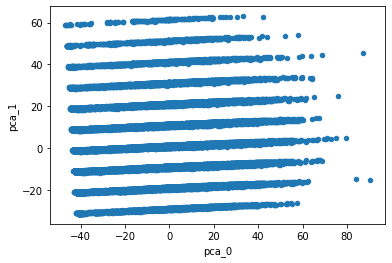

In [ ]:
import matplotlib.pyplot as plt

df_pca.plot(x ='pca_0', y='pca_1', kind = 'scatter')
plt.show()

For this reason, we explore nonlinear kernels for SVM and ran more experiments on KNN and decision trees.

#### Experiments and hyperparameter tuning

As we look at accuracy of the models, we should keep in mind that the proabilities of each label being selected at random are 'No': 0.5359, '<30' 0.1123, '>30':0.3519

- **Softmax Regression**

The dataset was preprocessed using standardscaler. By running the GridSearchCV on different hyperparameters C, the parameter set that returns the best performance is {'logistic__C': 1.0, 'logistic__penalty': 'l2'}. 

The corresponding accuracy is 0.56. Type I error rate for label 0: 'no readmission' is approximately 0.42 abd Type II error rate is approximately 0.32.

In [ ]:
# import data
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv (r'/content/drive/Shared drives/cogs118A/dataset_diabetes/X_multy_v3.csv')
data.drop(columns = 'Unnamed: 0', inplace = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import pakacages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# split train and test data
X = data.iloc[:, : -1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# run the logistic regresion through the Grisearch algorithm to test cifferent hyperparameters C
# we can see that C = 0.5 and C = 1 return very similar performances
scaler = StandardScaler()
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
pipe = Pipeline([("scaler", scaler), ("logistic", softReg)])
param_grid = {'logistic__penalty':['l2'],'logistic__C':[0.0001, 0.001, 0.01, 0.1, 1.0]}
gscv = GridSearchCV(pipe,param_grid)
gscv.fit(X_train, y_train)
cv_results = pd.DataFrame.from_dict(gscv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.872603,0.043940,0.026201,0.004486,0.0001,l2,"{'logistic__C': 0.0001, 'logistic__penalty': '...",0.558656,0.559781,0.558881,0.560156,0.557798,0.559054,0.000838,5
1,1.984148,0.599306,0.045574,0.026290,0.001,l2,"{'logistic__C': 0.001, 'logistic__penalty': 'l2'}",0.561281,0.564281,0.566157,0.568332,0.564924,0.564995,0.002315,4
2,3.048634,1.086279,0.039726,0.023036,0.01,l2,"{'logistic__C': 0.01, 'logistic__penalty': 'l2'}",0.561656,0.564056,0.567432,0.569082,0.563724,0.565190,0.002687,3
3,1.750710,0.155046,0.024486,0.002039,0.1,l2,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'}",0.561581,0.564131,0.567582,0.569157,0.564024,0.565295,0.002717,2
4,2.383697,0.535466,0.033066,0.011991,1.0,l2,"{'logistic__C': 1.0, 'logistic__penalty': 'l2'}",0.561506,0.564131,0.567582,0.569157,0.564099,0.565295,0.002731,1


In [ ]:
gscv.best_params_

{'logistic__C': 1.0, 'logistic__penalty': 'l2'}

In [ ]:
# test it with logistic regression
# the accuracy we got is around 0.56
scaler = StandardScaler()
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
pipe = Pipeline([("scaler", scaler), ("logistic", softReg)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
expected_y  = y_test
predicted_y = pipe.predict(X_test)
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))



              precision    recall  f1-score   support

         0.0       0.58      0.90      0.71     17604
         1.0       0.42      0.01      0.02      3635
         2.0       0.50      0.24      0.32     11594

    accuracy                           0.57     32833
   macro avg       0.50      0.38      0.35     32833
weighted avg       0.53      0.57      0.49     32833

[[15824     7  1773]
 [ 2607    31   997]
 [ 8812    36  2746]]


In [ ]:
## calcualte the Type I (false positive rate) and Type II (false negative rate) for each labels
confusion_matrix = metrics.confusion_matrix(expected_y, predicted_y)
print("false positive rate for label 0 is ", (1 - 0.58))
fnr = sum(confusion_matrix[0,1:])/sum(sum(confusion_matrix[:,1:]))
print("false negative rate for label 0 is ", fnr)

false positive rate for label 0 is  0.42000000000000004
false negative rate for label 0 is  0.35844155844155845


Some feature selection was also performed on the softmax model, and the redundant features were reported as below. But removing these features didn't improve the accuracy of our model.

In [ ]:
## some feature selection code
model = LogisticRegression(multi_class = 'multinomial', penalty ='l2', solver = 'lbfgs')
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
model.fit(X_train_std, y_train)
coef = model.coef_[0]
print("Redundant Feature Count:", sum(model.coef_[0] == 0))
print("Redundant Feature Names:", list(pd.Series(X_train.columns)[list(coef==0)]))

Redundant Feature Count: 3
Redundant Feature Names: ['No.15', 'No.16', 'No.21']


- MLP (a supplement to the softmax model)

Having the doubt the the dataset might not be modeled properly by a linear kernel. A multi-layer perceptron model was applied to the data to see if there is any improvement. The dataset was preprocessed using standardscaler. First the default mlp was applied on the dataset. The corresponding accuracy is 0.56. Type I error rate for label 0: 'no readmission' is approximately 0.41 abd Type II error rate is approximately 0.36. Later, we tried to perform a GridsearchCV to test different hyperparameters, but since the computational cost was huge, ultimately we did not complete running the search becasue perfomance on the other models did not support a hope of increase in performance.

In [ ]:
## import 
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
MLP = MLPClassifier()
pipe = Pipeline([("scaler", scaler), ("mlpc", MLP)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
expected_y  = y_test
predicted_y = pipe.predict(X_test)



In [ ]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

         0.0       0.59      0.84      0.69     17604
         1.0       0.27      0.04      0.07      3635
         2.0       0.48      0.29      0.36     11594

    accuracy                           0.56     32833
   macro avg       0.45      0.39      0.38     32833
weighted avg       0.51      0.56      0.51     32833

[[14844   124  2636]
 [ 2365   139  1131]
 [ 7924   253  3417]]


In [ ]:
print(pipe.score(X_test, y_test))
confusion_matrix = metrics.confusion_matrix(expected_y, predicted_y)
print("false positive rate for label 0 is ", (1 - 0.59))
fnr = sum(confusion_matrix[0,1:])/sum(sum(confusion_matrix[:,1:]))
print("false negative rate for label 0 is ", fnr)

0.5604117808302622
false positive rate for 0 is  0.41000000000000003
false negative rate for 0 is  0.35844155844155845


The code below was used to tune the hyperparameters, but we had to kill it manually because it ran for too long.

In [ ]:
param_grid = {'mlpc__solver':['adam', 'lbfgs', 'sgd'],'mlpc__activation':['identity', 'logistic', 'tanh', 'relu'], 'mlpc__alpha':[0.0001, 0.001, 0.01]}
gscv = GridSearchCV(pipe,param_grid)
gscv.fit(X_train, y_train)
cv_results = pd.DataFrame.from_dict(gscv.cv_results_)
cv_results

- **KNN**

In [ ]:
# import packages
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline

In [ ]:
# test the data with KNN
# 

K = []
training = []
test = []
scores = {}
f1_scores = {}
  
for k in range(1, 21):
    scaler = StandardScaler()
    Kneigh = KNeighborsClassifier(n_neighbors = k)
    pipe = Pipeline([("scaler", scaler), ("knn", Kneigh)])
    
    pipe.fit(X_train, y_train)
  
    training_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)
    y_pred = pipe.predict(X_test)

    macro = f1_score(y_test, y_pred, average='macro')
    micro = f1_score(y_test, y_pred, average='micro')
    weighted = f1_score(y_test, y_pred, average='weighted')
    

    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    f1_scores[k] = [macro, micro, weighted]

In [ ]:
# print the test
for keys, values in scores.items():
  print(keys, ':', values)

1 : [0.9971046670367092, 0.45579142935461275]
2 : [0.7292638653445146, 0.501720829653093]
3 : [0.710196672617351, 0.506776718545366]
4 : [0.673997509713617, 0.5186550117260074]
5 : [0.6589057741640288, 0.5191423263180337]
6 : [0.6453292128594789, 0.5289495324825633]
7 : [0.6367482260459952, 0.528370846404532]
8 : [0.6291873565460028, 0.5348582219108824]
9 : [0.6224065767563269, 0.5379648524350501]
10 : [0.6180110712731964, 0.5409191971492097]
11 : [0.612340419148202, 0.543203484299333]
12 : [0.6111552828575286, 0.5455182286114579]
13 : [0.6075398670847147, 0.5462187433374958]
14 : [0.6044795151442416, 0.5461882861754942]
15 : [0.602874330548013, 0.5486553162976274]
16 : [0.6012241407761892, 0.5506045746657326]
17 : [0.5988538681948424, 0.5512137179057656]
18 : [0.5972336818734154, 0.5510614320957573]
19 : [0.596123554208734, 0.5510614320957573]
20 : [0.5941733299329423, 0.5533761764078823]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


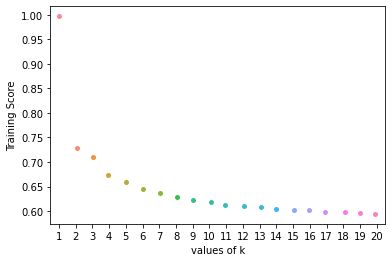

In [ ]:
# display training scores with respect to different k values
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


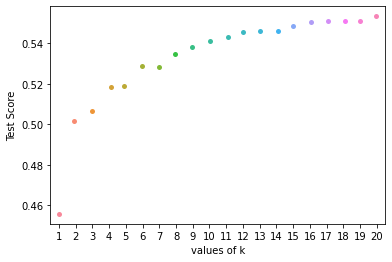

In [ ]:
# display testing scores with respect to different k values
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

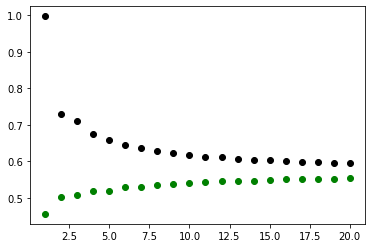

In [ ]:
# display both training & testing scores with respect to different k values
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

In order to tune the hyperparamaters for our KNN model we increased the value of K. We also rescaled the features as we know that KNN is a distance based algorithm. It is important to rescale so the units are not different during distance calculation. We used Standard Scaling, Robust Scaling and MinMax Scaling. The inital hyperparameter tuning was done manually and later supplemeted by gridsearch.

In [ ]:
for keys, values in scores.items():
  print(keys, ':', values)

5 : [0.727013606564755, 0.5799957359973198]
55 : [0.638923476199763, 0.6148082721651996]
105 : [0.6303424893862795, 0.6165138732372918]
155 : [0.626292023582712, 0.6146559863551915]
205 : [0.6218365111987879, 0.6129199281210976]
255 : [0.6209214059616855, 0.6127676423110895]
305 : [0.6191362006630763, 0.6102396978649529]
355 : [0.618221095425974, 0.6098742119209332]
405 : [0.6173809988148637, 0.6094478116529102]
455 : [0.6150557314091121, 0.6081381536868394]
505 : [0.6136755726908595, 0.6070112386927786]
555 : [0.6125954484765748, 0.6070416958547803]
605 : [0.6122054036214165, 0.6067675813967655]
655 : [0.6117403501402662, 0.6060975238327293]
705 : [0.6107352345519734, 0.6047878658666586]
755 : [0.6097151172384824, 0.6055492949166996]
805 : [0.6098651344904664, 0.6061584381567325]
855 : [0.6096851137880857, 0.605092437486675]
905 : [0.6089800327037609, 0.6055492949166996]
955 : [0.6079599153902698, 0.6053056376206865]


We calculated the model performance for values of k starting from 5 to 955 in an interval of 50. We found that the best value for K will be in between 100 and 130. The best result we got was a test score of 0.6165 for k=105. The model also only used Standard Scaling. We will also have to run the model on the multi-label datset. Therefore the performance will be lower. 

After finding the range for the best k values, we ran the model using Standard, Robust and MinMax Scaling. We found the best result by scaling the features using Robust Scaling. 

The dataset was preprocessed using Robust Scalar. We ran GridSearchCV on different hyperparameters n_neighbors and p. We used the range 100 to 130 to find the best k and we used both Euclidean and Manhattan distance for our model 

In [ ]:
n_neighbors = list(range(100,130))
p=[1,2]
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
clf = GridSearchCV(Kneigh, hyperparameters, cv=10)
best_model = clf.fit(X,y)

In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029992,0.004034,19.583461,6.283864,100,1,"{'n_neighbors': 100, 'p': 1}",0.351859,0.384824,0.535933,0.253593,0.195799,0.370892,0.300935,0.203840,0.194190,0.535833,0.332770,0.122028,60
1,0.031939,0.000501,10.819235,3.837921,100,2,"{'n_neighbors': 100, 'p': 2}",0.351859,0.384824,0.535933,0.253493,0.195698,0.370791,0.300734,0.203840,0.194793,0.535833,0.332780,0.121979,58
2,0.032260,0.000888,18.446579,5.384533,101,1,"{'n_neighbors': 101, 'p': 1}",0.351859,0.384724,0.535933,0.253593,0.196100,0.370791,0.301035,0.203840,0.194291,0.535833,0.332800,0.121973,57
3,0.032137,0.000622,10.734623,3.914093,101,2,"{'n_neighbors': 101, 'p': 2}",0.351859,0.384724,0.535933,0.253392,0.196402,0.370992,0.300834,0.203940,0.194492,0.535833,0.332840,0.121930,55
4,0.033434,0.002098,19.247969,5.107660,102,1,"{'n_neighbors': 102, 'p': 1}",0.351859,0.384925,0.535933,0.253493,0.195899,0.370691,0.300935,0.203840,0.194391,0.535833,0.332780,0.121998,59
5,0.032943,0.000539,10.866465,3.908196,102,2,"{'n_neighbors': 102, 'p': 2}",0.351859,0.384824,0.535933,0.253794,0.196301,0.370892,0.300834,0.203840,0.194592,0.535833,0.332870,0.121915,49
6,0.034106,0.001616,19.334142,5.272047,103,1,"{'n_neighbors': 103, 'p': 1}",0.351859,0.384824,0.535933,0.253694,0.196100,0.370892,0.301035,0.203940,0.194391,0.535833,0.332850,0.121951,54
7,0.033272,0.001580,10.856128,3.897087,103,2,"{'n_neighbors': 103, 'p': 2}",0.351859,0.384724,0.535933,0.253694,0.196301,0.370892,0.300935,0.203940,0.194592,0.535833,0.332870,0.121904,47
8,0.033004,0.000615,19.182827,5.265523,104,1,"{'n_neighbors': 104, 'p': 1}",0.351859,0.384824,0.535933,0.253593,0.195899,0.370892,0.301035,0.203940,0.194492,0.535833,0.332830,0.121969,56
9,0.032478,0.001373,10.978729,4.052047,104,2,"{'n_neighbors': 104, 'p': 2}",0.351859,0.384724,0.535933,0.253794,0.196301,0.370892,0.300834,0.203940,0.194592,0.535833,0.332870,0.121901,47


In [ ]:
clf.best_params_

{'n_neighbors': 124, 'p': 1}

We found that using k = 124 and the Manhattan distance will give the best performance. The corresponding accuracy is 0.5716. Type I error rate is 0.42 and Type II error rate is 0.32.

In [ ]:
scaler = RobustScaler()
Kneigh = KNeighborsClassifier(n_neighbors = 124)
pipe = Pipeline([("scaler", scaler), ("knn", Kneigh)])
    
pipe.fit(X_train, y_train)
  
training_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test) 
y_pred = pipe.predict(X_test)
expected_y  = y_test
print(metrics.classification_report(expected_y, y_pred))
print(metrics.confusion_matrix(expected_y, y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.88      0.71     17604
         1.0       0.42      0.01      0.03      3635
         2.0       0.50      0.28      0.36     11594

    accuracy                           0.57     32833
   macro avg       0.50      0.39      0.37     32833
weighted avg       0.54      0.57      0.51     32833

[[15413    12  2179]
 [ 2440    52  1143]
 [ 8235    61  3298]]


In [ ]:
confusion_matrix = metrics.confusion_matrix(expected_y, y_pred)
print("false positive rate for 0 is ", (1 - 0.59))
fnr = sum(confusion_matrix[0,1:])/sum(sum(confusion_matrix[:,1:]))
print("false negative rate for 0 is ", fnr)

false positive rate for 0 is  0.42000000000000004
false negative rate for 0 is  0.32483320978502594


- Linear SVM

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import LinearSVC
svm = LinearSVC(dual=False, multi_class='ovr')
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.561203667042305


In [ ]:
parameters = {'penalty':['l1', 'l2'], 'C':[0.5, 1, 10]}
grid_search = GridSearchCV(svm, parameters, cv=5)
grid_search.fit(X, y)
results = pd.DataFrame.from_dict(grid_search.cv_results_)
results

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.229533,1.330308,0.006934,0.000454,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",0.552842,0.558571,0.549603,0.570057,0.573676,0.56095,0.009434,5
1,1.446257,0.059177,0.008800,0.001165,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.552842,0.558621,0.549603,0.569907,0.573827,0.56096,0.009444,3
2,3.208818,1.280957,0.008536,0.002532,1,l1,"{'C': 1, 'penalty': 'l1'}",0.552842,0.558621,0.549603,0.570057,0.573676,0.56096,0.009432,3
3,1.448568,0.156619,0.006926,0.000370,1,l2,"{'C': 1, 'penalty': 'l2'}",0.552842,0.558621,0.549653,0.570057,0.573827,0.56100,0.009461,1
4,1.279406,0.100009,0.007108,0.000812,10,l1,"{'C': 10, 'penalty': 'l1'}",0.552842,0.558621,0.549603,0.570057,0.573726,0.56097,0.009446,2
5,1.357787,0.097534,0.006725,0.000167,10,l2,"{'C': 10, 'penalty': 'l2'}",0.552842,0.558571,0.549703,0.569756,0.573827,0.56094,0.009394,6


The accuracy of the linear model is around 0.56, which is not a big improvement from random guess.  Since the results of linear regression and linear SVM are not very good, we hypothesized that the data may not be linearly separable. Therefore, we tend to explore models that can fit nonlinear decision boundaries, such as kernel SVMs and decision trees.

- Non-linear SVMs

We used grid search with cross-validation to find the best kernel among polynomial, rbf, sigmoid. We found out rbf kernel gave the best result. Since it took several hours to run, we didn't include the cross-validation here. The accuracy for rbf kernel SVM is 0.568, type I error is 0.42, and Type II error is 0.30.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.5681174428166783


In [ ]:
from sklearn.metrics import classification_report
target_names = ['No', '<30', '>30']
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.58      0.91      0.71     17604
         <30       0.52      0.00      0.01      3635
         >30       0.51      0.22      0.31     11594

    accuracy                           0.57     32833
   macro avg       0.53      0.38      0.34     32833
weighted avg       0.55      0.57      0.49     32833



In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("false positive rate for label 0 is ", (1 - 0.58))
fnr = sum(confusion_matrix[0,1:])/sum(sum(confusion_matrix[:,1:]))
print("false negative rate for label 0 is ", fnr)

false positive rate for label 0 is  0.42000000000000004
false negative rate for label 0 is  0.30234814671065396


- Decision Trees

Since the default decision tree is highly overfitted(accuracy was really low), we first used grid search to find the best depth of the tree to regularize our model. We found out the best max depth is 3 and the corresponding accuracy is 0.566, type I error is 0.42 and type II error is 0.32.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

parameters = {'max_depth': np.arange(2, 11)}
grid_search = GridSearchCV(dt, parameters, cv=5)
grid_search.fit(X, y)
results = pd.DataFrame.from_dict(grid_search.cv_results_)

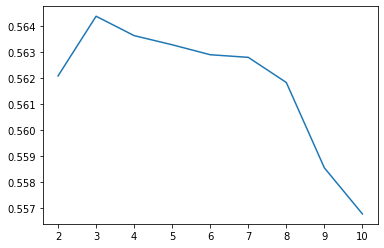

In [ ]:
plt.plot(results['param_max_depth'], results['mean_test_score'])

In [ ]:
# best decision tree
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train, y_train)
print(decision_tree.score(X_test, y_test))

0.5662290987725763


In [ ]:
from sklearn.metrics import classification_report
target_names = ['No', '<30', '>30']
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.58      0.89      0.71     17604
         <30       0.00      0.00      0.00      3635
         >30       0.49      0.25      0.33     11594

    accuracy                           0.57     32833
   macro avg       0.36      0.38      0.35     32833
weighted avg       0.48      0.57      0.49     32833



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("false positive rate for label 0 is ", (1 - 0.58))
fnr = sum(confusion_matrix[0,1:])/sum(sum(confusion_matrix[:,1:]))
print("false negative rate for label 0 is ", fnr)

false positive rate for label 0 is  0.42000000000000004
false negative rate for label 0 is  0.3208053691275168


#### Alternative models

As we looked at our results, we looked at smaller datasets. Using the number of patients that had a value for 'A1Cresult', we ran the experiment on a smaller dataset of 17,000 observations. However, the results did not improve. Some results for the smaller data set can be found here: https://colab.research.google.com/drive/1YeUh6x6jcyHdSE1iFEdFMP_ncNnNRGw1?usp=sharing

# Discussion

#### Interpreting the results

The model that best performed was KNN with an accuracy of 0.5716 on the testing set with the lowest accuracy of 0.56 for MLP.
We manually selected features mutiple times and ran numerous exeperiments with all 5 algorithms and accuracy did not improve. If the issue was simply that the data was not linearly separable, KNN and decision trees should have a much better accuracy. In the case of KNN we proved this by letting k vary in a range as large as (1, 5000) and accuracy did not improve in the dataset with ~98,000 observation and on the dataset with ~18,000 observations.
Now in terms of miminizing type 1 and type 2 errors, KNN also has better result to the other models with a false positive rate of 0.41 and false negative rate of 0.32. However, for all 5 models the difference is not so significant that we can claim that a particular model is definitely better than the others. For softmax regression we have FP rate: 0.42, FN rate:0.358
For MLP we have FP rate: 0.41, FN rate:0.358
For SVM we have FP rate: 0.42, FN rate:0.32
For decision trees we have FP rate: 0.41, FN rate:0.32

#### Limitations

One of the team member has a parent with diabetes and recognizes the importance of 'max_glu_serum', 'A1Cresult'. We believe having a lot of those values missing and not having the exact numerical value of the result are factors that limit how much we can learn from the dataset.
This is also true about not having the weight of the patient as sudden changes in weight are signs of rapid progression of diabetes. The data is also not representative of the diabetic population. Minorities are often disproportionally more affected by diabetes, but the dataset consists or mostly caucasian individuals.
Another limitation we faced was the wait time for the gridsearch and cross validation. Also, the way some variables were encoded made it hard to decide it the value was meaningful. For example the feature 'change_med' was not clear if the patient had changed the dosage or the medication name.

#### Ethics & Privacy


#### Data Collection:

####Our Concerns:
1) Did we consider what biases could affect our data collection? Are there any biases in our datasets? 

2) How can we limit exposure of the subjects?

#### Measures: 

We will be careful when generalizing our results such as, not making claims that our results can be generalized to the entire population. The dataset is disidentified in order to limit exposure of the subjects. Also all the subjects are aware of what data has been collected, for what purpose, and on agreement.  

#### Models:

#### Our Concerns:

1) Are we sure that our models do not rely on unfair variables? Are we unknowingly or knowingly choosing discriminatory variables? Can we say with certainty that our Model fair?

2) Can anyone easily explain and understand the decisions made by the model and the results? Is there any thing about the process or the results of the model that can confuse others?

3) Have we clearly addressed any and all limitations or shortcoming of our models? Have we purposefully marginalized any limitations to make us look good? Can people clearly explain when to use our model and when not to?


#### Analysis:

#### Our Concerns:

1) Are there any blindspots in our analysis? Any missing perespectives?

2) Are the visualizations we are using and the statistics we calculated honest? Are we accurately communicating the results of our experiments?  

3) Can this experiment and analysis be reproduced? If people reuse our model and datasets, will they come to same conclusion as us? 

#### Measures: 

We have taken steps to make sure that our data and models have no biases in them. Any statsitics or claims used in the analysis will be referenced for the readers to verify. In order to make sure that our experiment and analysis is reproducible we will make sure each step we took is clear and understandable. This will allow others to easily reproduce our results using our models and datasets.      



#### Conclusion

In conclusion, the accuracy results for the 5 different algorithms show that the dataset is not good as the predictions are not much better than random chance despite hyperparamter tuning and manual model selection. A large dataset doesn't guarantee sucess.

# Footnotes
<a name="abc"></a>1.[^](#abc):Mayo Foundation for Medical Education and Research. (2021, January 20). Type 2 diabetes. Mayo Clinic. Retrieved April 23, 2022, from https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/symptoms-causes/syc-20351193#:~:text=Potential%20complications%20of%20diabetes%20and,damage%20(neuropathy)%20in%20limbs. <br> 
<a name="admonishnote"></a>2.[^](#admonishnote): Ostling, S., Wyckoff, J., Ciarkowski, S. L., Pai, C.-W., Choe, H. M., Bahl, V., &amp; Gianchandani, R. (2017, March 22). The relationship between diabetes mellitus and 30-day readmission rates - clinical diabetes and endocrinology. BioMed Central. Retrieved April 23, 2022, from https://clindiabetesendo.biomedcentral.com/articles/10.1186/s40842-016-0040-x <br>
<a name="wfds"></a>3.[^](#wfds): Strack, B., DeShazo, J. P., Gennings, C., Olmo, J. L., Ventura, S., Cios, K. J., &amp; Clore, J. N. (2014, April 3). Impact of hba1c measurement on hospital readmission rates: Analysis of 70,000 clinical database patient records. BioMed Research International. Retrieved April 23, 2022, from https://doi.org/10.1155/2014/781670.

<a name="ander"></a>4.[^](#ander): Andersen, R., & Aday, L. A. (1978). Access to Medical Care in the U.S.: Realized and Potential. Medical Care, 16(7), 533–546. http://www.jstor.org/stable/3763653

<a name="ziller"></a>5.[^](#ziller):Ziller, E. (2014). Access to medical care in rural America. Rural public health: Best practices and preventive models, 11-28.